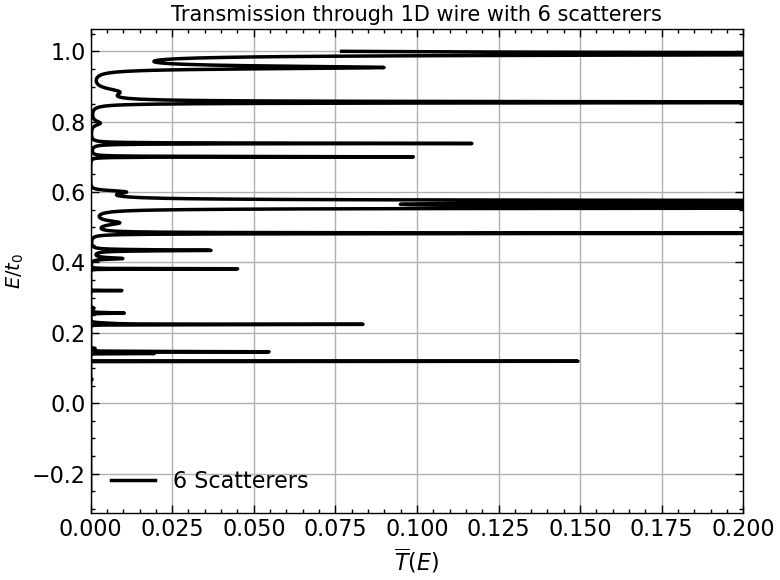

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0
Np = 100
Np1 = 11
Np2 = 23
Np3 = 7
Np4 = 31
zplus = 1j * 1e-12

# === Hamiltonian with 6 Scatterers ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# === Scatterer positions ===
UB = 2 * t0
n = 1
scatterer_profile = ([n] + [0]*Np1 + [1] + [0]*Np2 + [n] + [0]*Np3 + [n] +
                      [0]*Np4 + [n] + [0]*(Np - Np1 - Np2 - Np3 - Np4 - 6) + [n])
H = H0 + UB * np.diag(scatterer_profile)

# === Energy Sweep ===
dE = 1e-3
E_list = np.arange(-0.25, 1.0 + dE, dE) * t0
Tcoh = []
TM = []

for EE in E_list:
    # === Self-energies ===
    ck = 1 - (EE + zplus) / (2 * t0)
    ka = np.arccos(ck) if np.abs(ck) <= 1 else 1j * np.arccosh(np.abs(ck))
    s1 = -t0 * np.exp(1j * ka)
    s2 = s1

    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1
    Sigma2[-1, -1] = s2

    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # === Green's function ===
    G = np.linalg.inv((EE + zplus) * np.eye(Np) - H - Sigma1 - Sigma2)

    # === Spectral Function and Gn ===
    A_diag = np.real(np.diag(1j * (G - G.conj().T)))
    Gn = G @ Gamma1 @ G.conj().T

    # === Transmission ===
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    TM_val = np.real(np.trace(Gamma2 @ Gn))

    Tcoh.append(T)
    TM.append(TM_val)

# === Plot ===
plt.figure(figsize=(8, 6))
plt.plot(Tcoh, E_list / t0, 'k', linewidth=2.5, label="6 Scatterers")
plt.xlabel(r"$\overline{T}(E)$", fontsize=16)
plt.ylabel(r"$E / t_0$", fontsize=14)
plt.title("Transmission through 1D wire with 6 scatterers", fontsize=15)
plt.xlim(0,0.2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
